<a href="https://colab.research.google.com/github/DuongNguyen-ux/seq2seq-weather-forcasting/blob/main/weather_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Sau khi chạy đoạn code trên, một cửa sổ xác thực sẽ hiện ra. Bạn cần đăng nhập bằng tài khoản Google của mình và cho phép Colab truy cập Google Drive. Khi thành công, bạn sẽ thấy thông báo `Mounted at /content/drive`.

Bây giờ, bạn có thể truy cập các tệp trên Drive của mình thông qua đường dẫn `/content/drive/My Drive/`. Ví dụ, nếu bạn có một tệp CSV tên là `my_data.csv` nằm trong thư mục `Data` trên Google Drive của bạn, đường dẫn để truy cập nó trong Colab sẽ là `/content/drive/My Drive/Data/my_data.csv`.

In [ ]:
import pandas as pd

# Thay đổi 'your_folder/your_file.csv' bằng đường dẫn thực tế đến file của bạn trên Google Drive
file_path = '/content/drive/MyDrive/jena_climate_2009_2016.csv'

try:
    df = pd.read_csv(file_path)
    print("Đã tải dữ liệu thành công!")
    display(df.head())
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file tại đường dẫn: {file_path}")
except Exception as e:
    print(f"Đã xảy ra lỗi khi đọc file: {e}")


Đã tải dữ liệu thành công!


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:

# Chuyển cột 'Date Time' thành datetime và set làm index
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df.set_index('Date Time', inplace=True)

# Khám phá dữ liệu
print("Shape của dataset gốc:", df.shape)
df.info()
df.describe()
print("\nSố lượng NA trong mỗi cột:")
print(df.isnull().sum())


Shape của dataset gốc: (420551, 14)

Info của dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420551 entries, 2009-01-01 00:10:00 to 2017-01-01 00:00:00
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p (mbar)         420551 non-null  float64
 1   T (degC)         420551 non-null  float64
 2   Tpot (K)         420551 non-null  float64
 3   Tdew (degC)      420551 non-null  float64
 4   rh (%)           420551 non-null  float64
 5   VPmax (mbar)     420551 non-null  float64
 6   VPact (mbar)     420551 non-null  float64
 7   VPdef (mbar)     420551 non-null  float64
 8   sh (g/kg)        420551 non-null  float64
 9   H2OC (mmol/mol)  420551 non-null  float64
 10  rho (g/m**3)     420551 non-null  float64
 11  wv (m/s)         420551 non-null  float64
 12  max. wv (m/s)    420551 non-null  float64
 13  wd (deg)         420551 non-null  float64
dtypes: float64(14)
memory usage: 48.1 MB
None



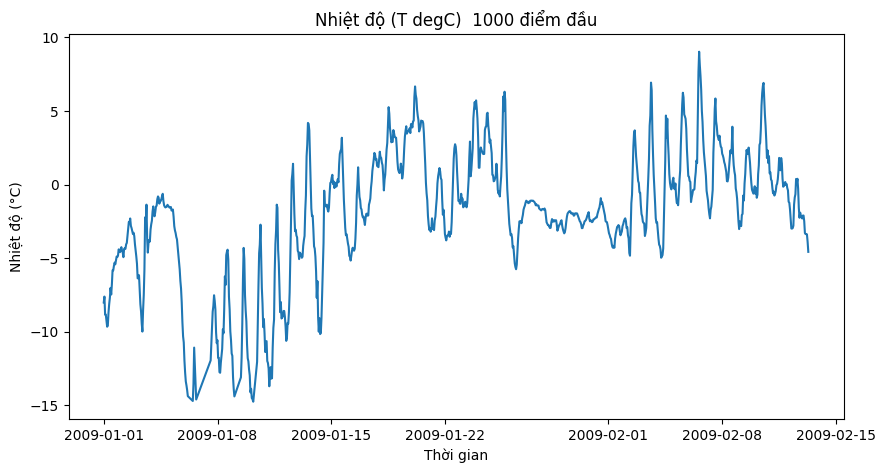

In [ ]:
# Visualize một cột mẫu (nhiệt độ) để kiểm tra
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df.index[:1000], df['T (degC)'][:1000])  # Plot 1000 điểm đầu tiên
plt.title('Nhiệt độ (T degC)  1000 điểm đầu')
plt.xlabel('Thời gian')
plt.ylabel('Nhiệt độ (°C)')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Cell 3: Làm sạch dữ liệu
# Xử lý NA: Fill bằng mean cho các cột số (nếu có NA)
# Kiểm tra phiên bản pandas để tránh lỗi (numeric_only=True có từ pandas 1.5+)
try:
    df.fillna(df.mean(numeric_only=True), inplace=True)
except TypeError:
    # Nếu phiên bản cũ, dùng cách khác
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print("Sau khi xử lý NA, số lượng NA còn lại:", df.isnull().sum().sum())

# Loại outlier cho cột 'T (degC)' sử dụng IQR
Q1 = df['T (degC)'].quantile(0.25)
Q3 = df['T (degC)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Bounds cho outlier (T degC): [{lower_bound:.2f}, {upper_bound:.2f}]")
df = df[(df['T (degC)'] >= lower_bound) & (df['T (degC)'] <= upper_bound)]
print("Shape sau khi loại outlier:", df.shape)

# Cell 4: Subsample dữ liệu để giảm memory (từ mỗi 10 phút xuống mỗi giờ)
df = df.iloc[::6]  # Mỗi 6 hàng (1 giờ)
print("Shape sau khi subsample (mỗi giờ):", df.shape)  # ~70k hàng

# Cell 5: Tạo cửa sổ thời gian (time windows) - Giảm kích thước để tránh MemoryError
# Giả sử dự đoán 'T (degC)' (nhiệt độ) từ 3 ngày quá khứ (432 timesteps) để dự đoán 1 ngày tiếp theo (144 timesteps)
# Dataset mỗi giờ, nên 24 timesteps/ngày
input_steps = 3 * 24  # 72 (giảm từ 720)
output_steps = 1 * 24  # 24 (giảm từ 432)

# Hàm tạo sequences (dùng float32 để giảm memory)
def create_sequences(data, input_steps, output_steps):
    X, y = [], []
    for i in range(len(data) - input_steps - output_steps + 1):
        X.append(data[i:i + input_steps])  # Input: 3 ngày quá khứ
        y.append(data[i + input_steps:i + input_steps + output_steps, 0])  # Output: 1 ngày tiếp theo của cột đầu (T degC)
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)  # Dùng float32

# Chuẩn hóa dữ liệu trước khi tạo sequences (sử dụng MinMaxScaler)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.values).astype(np.float32)  # Scale và chuyển float32

# Tạo sequences
X, y = create_sequences(scaled_data, input_steps, output_steps)
print("Shape của X (inputs):", X.shape)  # ~ (samples, 72, 14)
print("Shape của y (outputs):", y.shape)  # ~ (samples, 24)
# Ước tính memory: X ~ (67k, 72, 14) * 4 bytes ~ 0.13 GiB; y ~ (67k, 24) * 4 ~ 0.006 GiB

# Cell 6: Tách tập train/val/test (theo thời gian, không shuffle)
total_samples = len(X)
train_size = int(0.7 * total_samples)
val_size = int(0.2 * total_samples)
test_size = total_samples - train_size - val_size

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

print(f"Train size: {len(X_train)}, Val size: {len(X_val)}, Test size: {len(X_test)}")

# Cell 7: Lưu dữ liệu đã xử lý
# Lưu vào file .npz (chứa arrays và scaler attributes để inverse transform)
np.savez('processed_data.npz',
         X_train=X_train, y_train=y_train,
         X_val=X_val, y_val=y_val,
         X_test=X_test, y_test=y_test,
         scaler_data_min=scaler.data_min_,  # Để tái tạo scaler
         scaler_data_max=scaler.data_max_,
         scaler_data_range=scaler.data_range_)

print("Dữ liệu đã được lưu vào 'processed_data.npz'")

Sau khi xử lý NA, số lượng NA còn lại: 0
Bounds cho outlier (T degC): [-14.63, 33.48]
Shape sau khi loại outlier: (11639, 14)
Shape sau khi subsample (mỗi giờ): (1940, 14)
Shape của X (inputs): (1845, 72, 14)
Shape của y (outputs): (1845, 24)
Train size: 1291, Val size: 369, Test size: 185
Dữ liệu đã được lưu vào 'processed_data.npz'


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8')
sns.set_theme(color_codes=True)
plt.rcParams['figure.figsize'] = (12, 5)

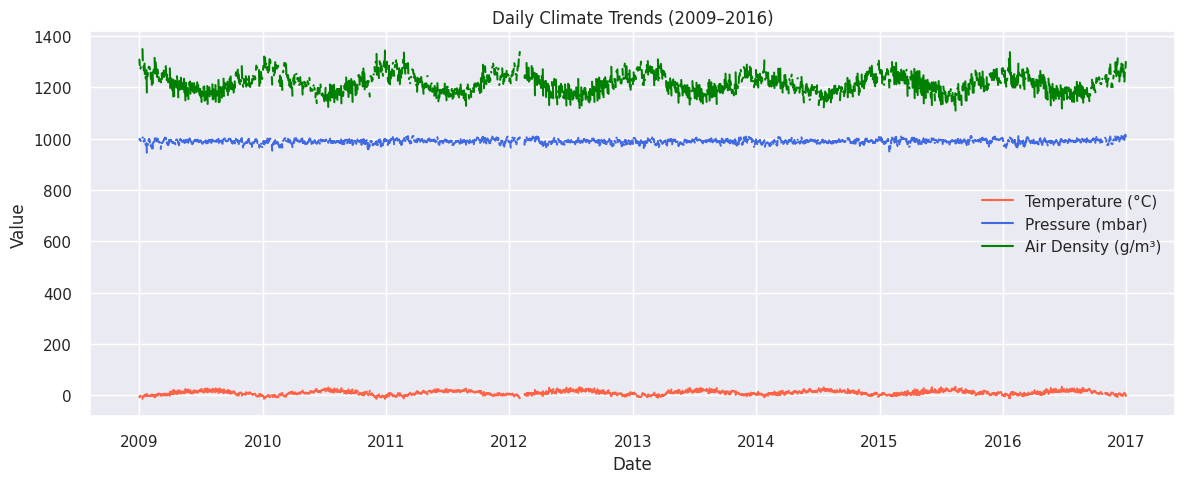

In [ ]:
# Giảm nhiễu: lấy trung bình theo ngày
daily = df.resample('D').mean()
daily.head()

plt.figure(figsize=(14, 5))
plt.plot(daily.index, daily['T (degC)'], label='Temperature (°C)', color='tomato')
plt.plot(daily.index, daily['p (mbar)'], label='Pressure (mbar)', color='royalblue')
plt.plot(daily.index, daily['rho (g/m**3)'], label='Air Density (g/m³)', color='green')
plt.title('Daily Climate Trends (2009–2016)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

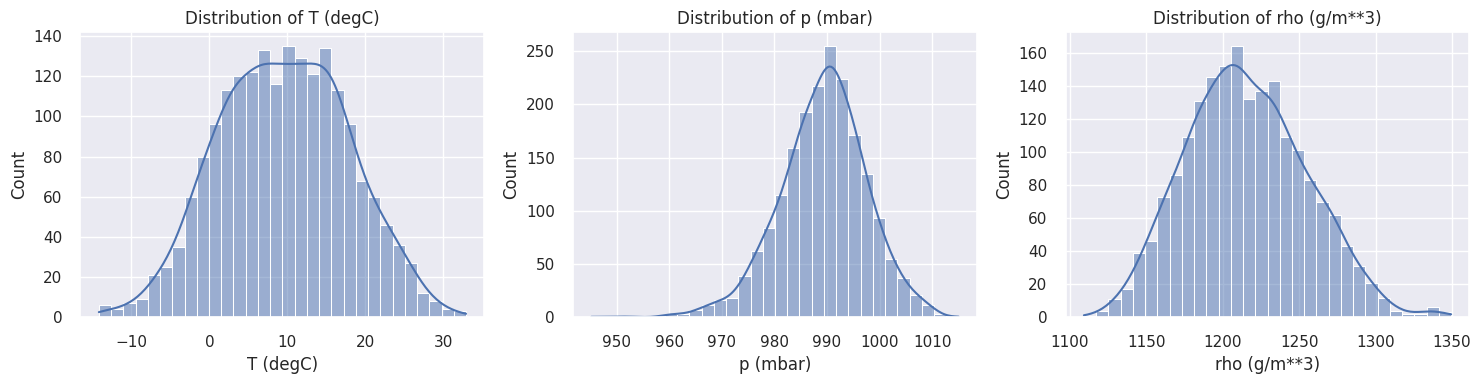

In [ ]:
plt.figure(figsize=(15, 4))
for i, c in enumerate(['T (degC)', 'p (mbar)', 'rho (g/m**3)']):
    plt.subplot(1, 3, i+1)
    sns.histplot(daily[c], bins=30, kde=True)
    plt.title(f'Distribution of {c}')
plt.tight_layout()
plt.show()


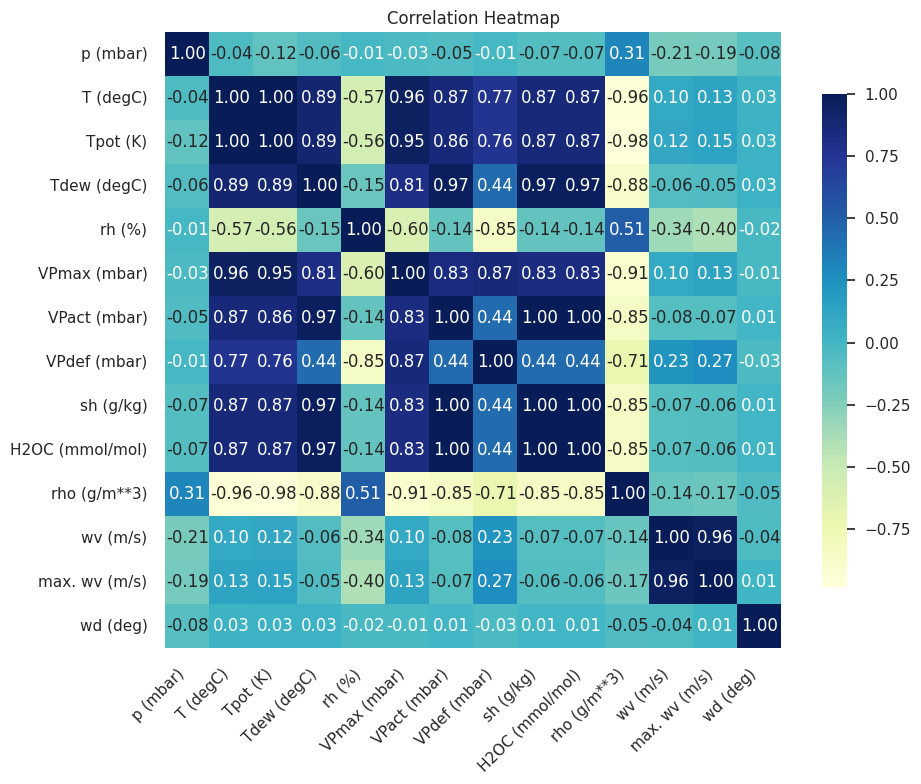

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    annot=True,
    cmap='YlGnBu',
    fmt=".2f",
    annot_kws={"size": 12},
    square=True,
    cbar_kws={'shrink': .8}
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1821224127.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='T (degC)', data=daily, palette='coolwarm')


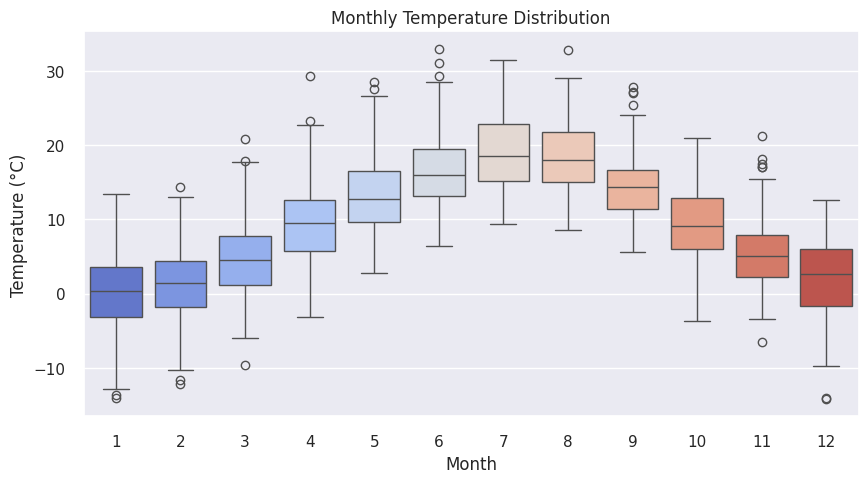

In [ ]:
daily['month'] = daily.index.month
plt.figure(figsize=(10,5))
sns.boxplot(x='month', y='T (degC)', data=daily, palette='coolwarm')
plt.title('Monthly Temperature Distribution')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

/tmp/ipython-input-70714928.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = daily.resample('Y').mean()


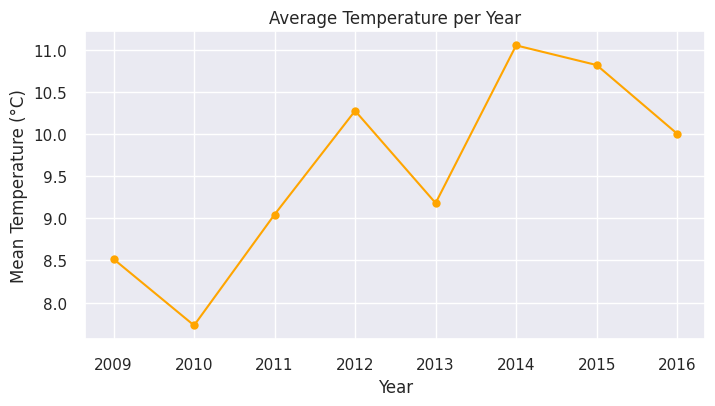

In [ ]:
yearly = daily.resample('Y').mean()
plt.figure(figsize=(8,4))
plt.plot(yearly.index.year, yearly['T (degC)'], marker='o', color='orange')
plt.title('Average Temperature per Year')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.grid(True)
plt.show()


In [ ]:

df = df.iloc[:50000].copy()

# Chọn các cột đặc trưng (features)
features = df[['T (degC)', 'p (mbar)', 'rho (g/m**3)']]

# Chuẩn hóa dữ liệu về khoảng [0,1]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

print("Kích thước dữ liệu sau khi scale:", scaled_features.shape)


Kích thước dữ liệu sau khi scale: (1940, 3)


In [ ]:
# Hàm tạo đầu vào X
def create_sequences(data, window_size, future):
    X = []
    for i in range(len(data) - window_size - future + 1):
        X.append(data[i : i + window_size])
    return np.array(X)

# Hàm tạo đầu ra y (dự đoán nhiệt độ)
def create_sequences_target(data, window_size, future):
    y = []
    for i in range(len(data) - window_size - future + 1):
        y.append(data[i + window_size : i + window_size + future, 0])  # cột 0 là 'T (degC)'
    return np.array(y)

# Đặt tham số nhỏ hơn để giảm thời gian
window_size = 72
future = 24

# Tạo dữ liệu đầu vào/đầu ra
X_seq = create_sequences(scaled_features, window_size, future)
y_seq = create_sequences_target(features.to_numpy(), window_size, future)

print("X shape:", X_seq.shape)
print("y shape:", y_seq.shape)

X shape: (1845, 72, 3)
y shape: (1845, 24)


In [ ]:
# Chia dữ liệu train/test
split = int(len(X_seq) * 0.8)
X_train_ts, X_test_ts = X_seq[:split], X_seq[split:]
y_train_ts, y_test_ts = y_seq[:split], y_seq[split:]

print(f"Train shape: {X_train_ts.shape}, Test shape: {X_test_ts.shape}")
print(f"Train target: {y_train_ts.shape}, Test target: {y_test_ts.shape}")

Train shape: (1476, 72, 3), Test shape: (369, 72, 3)
Train target: (1476, 24), Test target: (369, 24)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Lấy thông tin đầu vào
window_size = X_train_ts.shape[1]
num_features = X_train_ts.shape[2]
future = y_train_ts.shape[1]

# Xây dựng mô hình
model = Sequential([
    LSTM(64, input_shape=(window_size, num_features), return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dense(16, activation='relu'),
    Dense(future)
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Callback dừng sớm
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('lstm_jena_model_small.keras', save_best_only=True, monitor='val_loss')
]

# Huấn luyện
history = model.fit(
    X_train_ts, y_train_ts,
    validation_split=0.2,
    epochs=30,
    batch_size=128,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - loss: 150.8855 - mae: 10.1846 - val_loss: 168.0011 - val_mae: 10.9526
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 157.7435 - mae: 10.4942 - val_loss: 162.8496 - val_mae: 10.7383
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 148.8348 - mae: 10.1176 - val_loss: 155.9359 - val_mae: 10.4526
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 140.3076 - mae: 9.7640 - val_loss: 146.8449 - val_mae: 10.0819
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 136.1168 - mae: 9.6228 - val_loss: 136.0876 - val_mae: 9.6456
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 123.4622 - mae: 9.1036 - val_loss: 124.6635 - val_mae: 9.1826
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 114.3528 - mae: 8.7502 - val_loss: 113.1381 - val_mae: 8.7100
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 110.0259 - mae: 8.5860 - val_loss: 101.5479 - val_mae: 8.2280
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━

In [ ]:
from tensorflow import keras

model.save("lstm_jena_model_small.keras")
lstm_jena_model = keras.models.load_model("lstm_jena_model_small.keras")

print(" Mô hình đã được huấn luyện và lưu thành công!")

# Task
Evaluate the trained LSTM model on the test dataset (`X_test_ts`, `y_test_ts`), make predictions, and visualize the actual versus predicted values of the temperature ('T (degC)') from the test set.

## Evaluate Model

### Subtask:
Evaluate the trained LSTM model on the test dataset (X_test_ts, y_test_ts) to get the loss and MAE metrics.
